In [1]:
from astropy.table import Table, Column
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
from scipy.stats import kde
from tqdm import tqdm
sys.path.insert(0, '/home/reza/erq/')
from erqml import *
import sys
sys.path.insert(0, '/home/reza/erq')
from scipy import interpolate
# import pyfits
from numpy import *
import math
import scipy.ndimage
from scipy import interpolate
from numpy import nanmean
from numpy import nanmedian
from readSDSSspectrafast import *
import matplotlib.pylab as plt
import numpy as np
from erqml import *
from scipy import ndimage
from line_db import line_db
import os
# Reading data
smp=Table.read('/home/reza/erq/sampling/org_sample2.fits')
# smp=Table.read('/home/reza/erq/sampling/LM_sample.fits')
W3_0=smp['ABw3']
iW3_0 = smp['i-w3']
kt80_0= smp['kurt80_gf']
rew_0 = smp['rew_gf']
# rew_0  = np.log10(rew_0)
frat_0 = smp['frat_nv/civ']
fwhm_0 = smp['fwhm_gf']
rw3_0=smp['r-w3']
rz_0=smp['r-z']
iz_0 = iW3_0 - rw3_0 + rz_0
Lum_0 = smp['Lum']
z_dr12=smp['z_dr12']
nqsos_0=len(iW3_0)
plate_0 = smp['Plate']
mjd_0 = smp['MJD']
fiberid_0= smp['FiberID']
rew_n5_0 = smp['rew_nv']
smp.columns


/home/reza/anaconda3/lib/python3.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


<TableColumns names=('sdss_name','Plate','MJD','FiberID','ThingID','z_dr12','snr_1700','snr_spec','bal_flag_vi','bi_civ','err_bi_civ','ai_civ','err_ai_civ','vmin_civ_450','fwhm_civ','rewe_civ','err_rewe_civ','f1450','alpha_civ','alpha_nv','alpha_all','alphae_all','alpha_allc','alphae_allc','rew_gf','rewe_gf','rewsnr_gf','rew_gfc','rew_gfw','qflag','fwhm_gf','fwhme_gf','fwhmsnr_gf','fwhm_gfc','fwhm_gfw','sigma_gf','peak_gf','peaksnr_gf','rat_gf','wcent_gf','wciv0_gf','wcore_gf','wcoree_gf','shift_gf','asy_gf','kurt75_gf','kurt80_gf','rew_di','rewe_di','fwhm_di','peak_di','wciv_di','rew_nv','frat_nv/civ','crat_nv/civ','scale','nvflag','ABg','ABg_err','ABr','ABr_err','ABi','ABi_err','ABz','ABz_err','Mi','ABw1','ABw1_snr','ABw2','ABw2_snr','ABw3','ABw3_snr','ABw4','ABw4_snr','r-z','i-w1','i-w3','r-w3','i-w4','r-w4','w3-w4','uniform','boss_tar1','anc_tar1','anc_tar2','sdss_dr7','cc_flags','ABy','ABy_err','ABj','ABj_err','ABh','ABh_err','ABk','ABk_err','first_matched','first_flux','first_snr

In [2]:
len(iW3_0[(iW3_0>=4.6) &(rew_0>=2)])

168

In [3]:
#  ---------r-z sample
z_cut = 2.8
W3_rz= W3_0[z_dr12<=z_cut]
iW3_rz = iW3_0[z_dr12<=z_cut]
kt80_rz= kt80_0[z_dr12<=z_cut]
rew_rz = rew_0[z_dr12<=z_cut]
frat_rz = frat_0[z_dr12<=z_cut]
fwhm_rz = fwhm_0[z_dr12<=z_cut]
rw3_rz=rw3_0[z_dr12<=z_cut]
rz_rz=rz_0[z_dr12<=z_cut]
iz_rz = iW3_rz - rw3_rz + rz_rz
Lum_rz = Lum_0[z_dr12<=z_cut]
plate_rz = plate_0[z_dr12<=z_cut]
mjd_rz = mjd_0[z_dr12<=z_cut]
fiberid_rz=fiberid_0[z_dr12<=z_cut]
rew_n5_rz = rew_n5_0[z_dr12<=z_cut]
nqsos_rz=len(iW3_rz)
print(nqsos_0-nqsos_rz)
# smp.columns

6923


In [4]:
rew_ratio= rew_n5_0/rew_0


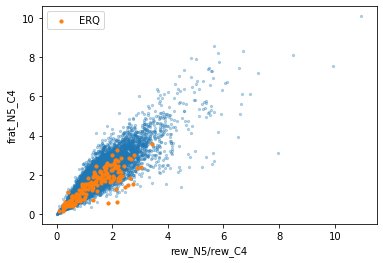

In [5]:
plt.scatter(rew_ratio[rew_n5_0>0], frat_0[rew_n5_0>0], s=5, alpha=0.3)
plt.scatter(rew_ratio[(rew_n5_0>0) & (iW3_0>=4.6) & (rew_0>=2) ], frat_0[(rew_n5_0>0) & (iW3_0>=4.6) & (rew_0>=2)], s=10, label='ERQ')
plt.xlabel('rew_N5/rew_C4')
plt.ylabel('frat_N5_C4')
plt.legend()
plt.savefig('rew-frat.pdf', bbox_inches='tight')

In [6]:
len(rew_n5_0[rew_n5_0==-1])

121

In [9]:
%matplotlib
f = plt.figure()
ax =Axes3D(f)
ax.scatter(rew_0[rew_n5_0>0], rew_n5_0[rew_n5_0>0], frat_0[rew_n5_0>0], s=5, alpha=0.4)
ax.scatter(rew_0[(rew_n5_0>0) & (iW3_0>=4.6) & (rew_0>=2) ], rew_n5_0[(rew_n5_0>0) & (iW3_0>=4.6) & (rew_0>=2)], 
          frat_0[(rew_n5_0>0) & (iW3_0>=4.6) & (rew_0>=2)], s=10)


Using matplotlib backend: Qt5Agg


In [10]:
plt.scatter(Lum_0, rew_0)